# Data "BanE-16 dataset"

## Source:

https://data.mendeley.com/datasets/3brbjpt39s/2 <br>
https://pmc.ncbi.nlm.nih.gov/articles/PMC10792676/#sec0006

## An outline of the variables measured in the BanE-16 dataset.

| **Name of data column**      | **Description** |
|-----------------------------|----------------|
| Month                       | Represents the month of the recorded data. |
| Year                        | Indicates the year of the recorded data. |
| Temp2(c)                    | Temperature at a certain location using the sensor. (Celsius °C) |
| Temp2_max(c)                | Maximum temperature recorded within a specific period. (Celsius °C) |
| Temp2_min(c)                | Minimum temperature recorded within a specific period. (Celsius °C) |
| Temp2_ave(c)                | Average temperature recorded within a specific period. (Celsius °C) |
| Suface_pressure(pa)         | Atmospheric pressure at the surface level. |
| Wind_speed50_max(m/s)       | Maximum wind speed recorded at 50 m above ground level. |
| Wind_speed50_min(m/s)       | Minimum wind speed recorded at 50 m above ground level. |
| Wind_speed50_ave(m/s)       | The average wind speed was recorded at 50 m above ground level. |
| Prectocorr                  | Precipitation correlation or precipitation-related measurement. |
| Total_demand(mw)            | Total electricity demand is measured in megawatts. |
| Max_generation(mw)          | Maximum electricity generation recorded in megawatts. |


# Data manipulation

## Preprocessing the data

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load the dataset
file_path = "final_dataset_v2.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,date_1,day,month,year,temp2(c),temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),date_2,max_generation(mw)
0,2018-01-01 00:00:00,1,1,2018,19.11,24.48,13.78,19.130,101.08,5.05,0.23,2.640,0.00,8000.0,2018-01-01 00:00:00,7651.0
1,2018-02-01 00:00:00,2,1,2018,18.24,23.16,15.28,19.220,100.94,6.20,1.59,3.895,0.01,7900.0,2018-02-01 00:00:00,7782.0
2,2018-03-01 00:00:00,3,1,2018,15.78,22.65,11.52,17.085,101.12,6.96,3.64,5.300,0.17,7900.0,2018-03-01 00:00:00,7707.0
3,2018-04-01 00:00:00,4,1,2018,13.78,20.32,8.19,14.255,101.34,5.91,1.54,3.725,0.34,8000.0,2018-04-01 00:00:00,7715.0
4,2018-05-01 00:00:00,5,1,2018,13.87,20.79,8.24,14.515,101.17,6.02,3.09,4.555,0.00,7200.0,2018-05-01 00:00:00,6926.0


In [3]:
# Drop the specified columns
data = data.drop(columns=['day', 'month', 'year', 'temp2(c)', 'date_2'])

# Rename 'date_1' to 'date'
data = data.rename(columns={'date_1': 'date'})

# Display the updated dataset
data.head()

,date,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
0,2018-01-01 00:00:00,24.48,13.78,19.130,101.08,5.05,0.23,2.640,0.00,8000.0,7651.0
1,2018-02-01 00:00:00,23.16,15.28,19.220,100.94,6.20,1.59,3.895,0.01,7900.0,7782.0
2,2018-03-01 00:00:00,22.65,11.52,17.085,101.12,6.96,3.64,5.300,0.17,7900.0,7707.0
3,2018-04-01 00:00:00,20.32,8.19,14.255,101.34,5.91,1.54,3.725,0.34,8000.0,7715.0
4,2018-05-01 00:00:00,20.79,8.24,14.515,101.17,6.02,3.09,4.555,0.00,7200.0,6926.0


In [4]:
# Generate a date range starting from the minimum date in the dataset
data.loc[:, 'date'] = pd.date_range(start=data['date'][0], periods=len(data), freq='D')

# Display the updated dataset
data.head()

,date,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
0,2018-01-01 00:00:00,24.48,13.78,19.130,101.08,5.05,0.23,2.640,0.00,8000.0,7651.0
1,2018-01-02 00:00:00,23.16,15.28,19.220,100.94,6.20,1.59,3.895,0.01,7900.0,7782.0
2,2018-01-03 00:00:00,22.65,11.52,17.085,101.12,6.96,3.64,5.300,0.17,7900.0,7707.0
3,2018-01-04 00:00:00,20.32,8.19,14.255,101.34,5.91,1.54,3.725,0.34,8000.0,7715.0
4,2018-01-05 00:00:00,20.79,8.24,14.515,101.17,6.02,3.09,4.555,0.00,7200.0,6926.0


In [5]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
total_demand(mw)      25
max_generation(mw)    35
dtype: int64


In [6]:
# Filtrer les lignes contenant des valeurs NaN
rows_with_nan = data[data.isnull().any(axis=1)]

# Afficher les lignes avec des valeurs NaN
print("Number of rows with NaN values:", len(rows_with_nan))


Number of rows with NaN values: 52


Since 52 is negligible compared to the dataset size of 1946, we can drop them without any problem.

In [7]:
# Drop rows with NaN values
data = data.dropna()

# Display the updated dataset
data.head()

,date,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
0,2018-01-01 00:00:00,24.48,13.78,19.130,101.08,5.05,0.23,2.640,0.00,8000.0,7651.0
1,2018-01-02 00:00:00,23.16,15.28,19.220,100.94,6.20,1.59,3.895,0.01,7900.0,7782.0
2,2018-01-03 00:00:00,22.65,11.52,17.085,101.12,6.96,3.64,5.300,0.17,7900.0,7707.0
3,2018-01-04 00:00:00,20.32,8.19,14.255,101.34,5.91,1.54,3.725,0.34,8000.0,7715.0
4,2018-01-05 00:00:00,20.79,8.24,14.515,101.17,6.02,3.09,4.555,0.00,7200.0,6926.0


In [8]:
# Ensure the index is a DatetimeIndex with a proper frequency
data.set_index(pd.date_range(start=data["date"][0], periods=len(data), freq='D'), inplace=True)
data.drop(columns=['date'], inplace=True)

In [9]:
data.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
2018-01-01,24.48,13.78,19.130,101.08,5.05,0.23,2.640,0.00,8000.0,7651.0
2018-01-02,23.16,15.28,19.220,100.94,6.20,1.59,3.895,0.01,7900.0,7782.0
2018-01-03,22.65,11.52,17.085,101.12,6.96,3.64,5.300,0.17,7900.0,7707.0
2018-01-04,20.32,8.19,14.255,101.34,5.91,1.54,3.725,0.34,8000.0,7715.0
2018-01-05,20.79,8.24,14.515,101.17,6.02,3.09,4.555,0.00,7200.0,6926.0


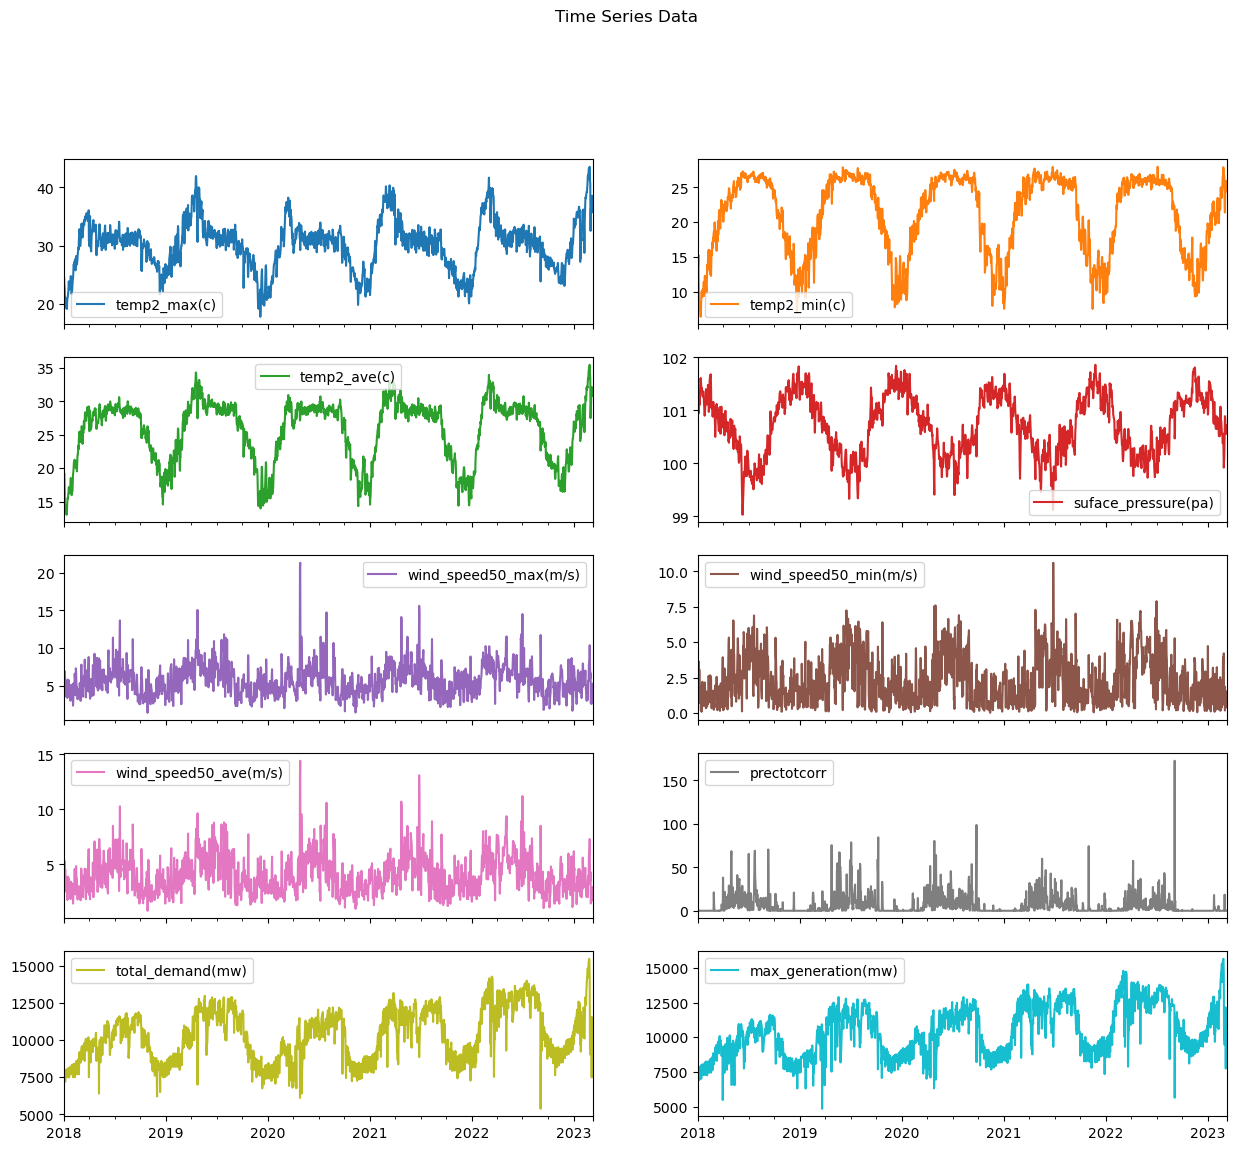

In [10]:
data.plot(subplots=True, figsize=(15, 15), layout=(6, 2), title="Time Series Data")
plt.show()

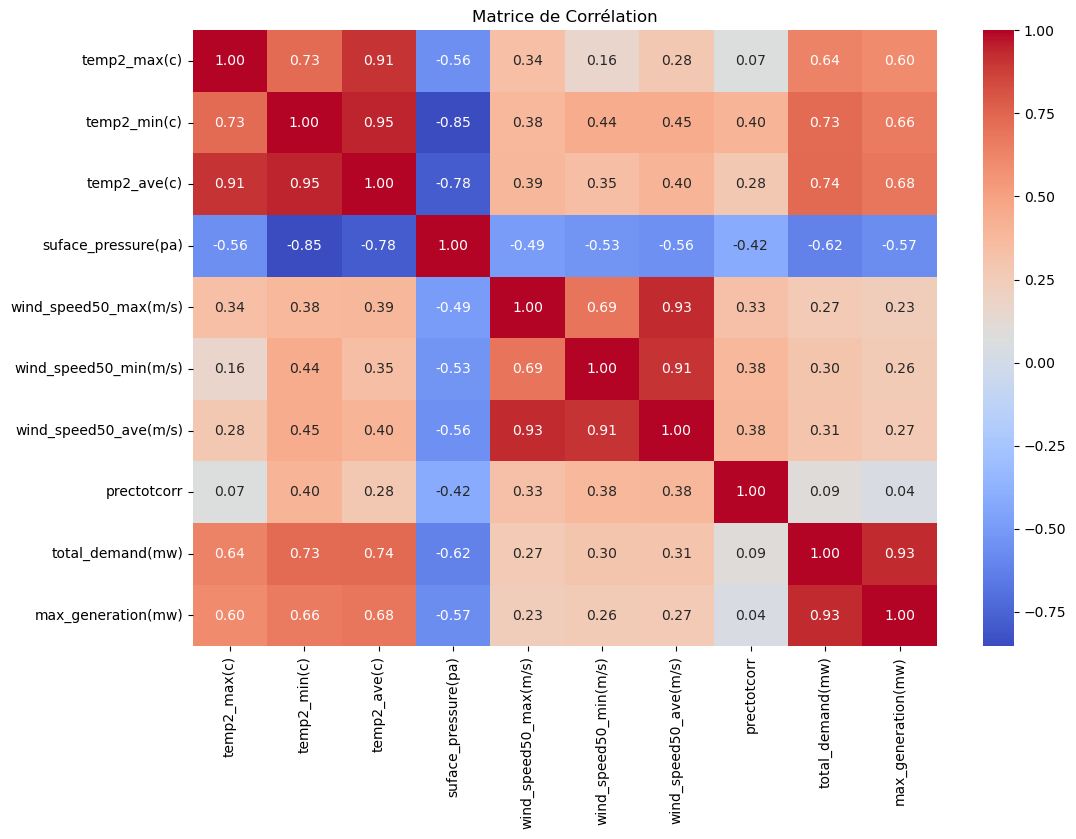

In [12]:
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()

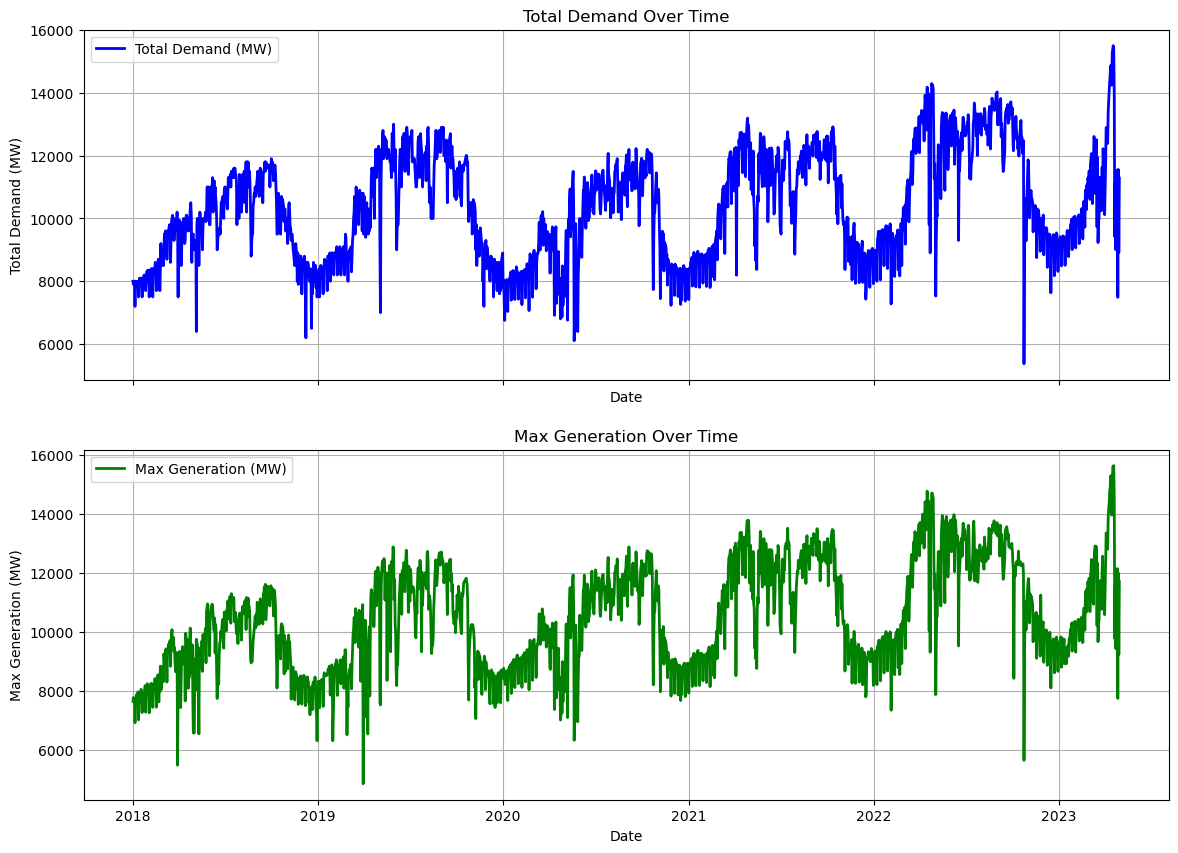

In [8]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot "total_demand(mw)" in the first subplot
axes[0].plot(data['date'], data['total_demand(mw)'], label='Total Demand (MW)', color='blue', linewidth=2)
axes[0].set_title('Total Demand Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Demand (MW)')
axes[0].legend()
axes[0].grid()

# Plot "max_generation(mw)" in the second subplot
axes[1].plot(data['date'], data['max_generation(mw)'], label='Max Generation (MW)', color='green', linewidth=2)
axes[1].set_title('Max Generation Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Max Generation (MW)')
axes[1].legend()
axes[1].grid()

# Show the plots
plt.show()

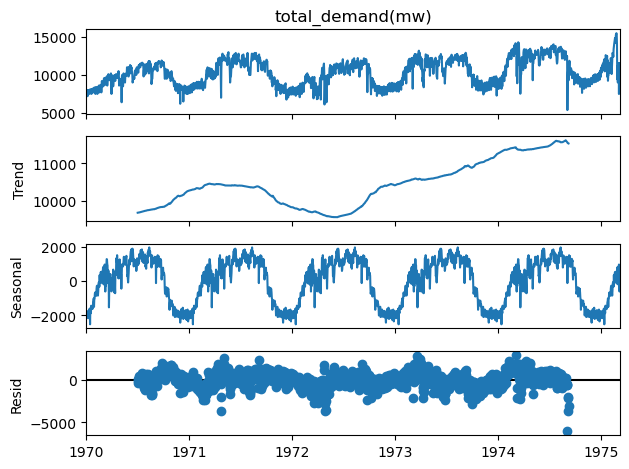

In [9]:
# Ensure the index is a DatetimeIndex with a proper frequency
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='D')

# Perform seasonal decomposition
result = seasonal_decompose(data['total_demand(mw)'], model='additive', period=365)

# Plot the decomposition results
result.plot()
plt.show()

In [10]:
# Set the 'date' column as the index
data.set_index('date', inplace=True)

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [11]:
# Calculate the split index
split_index = int(len(data) * 0.8)

# Split the data
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Display the shapes of the training and test sets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (1515, 10)
Test data shape: (379, 10)


In [12]:
# Save the training data to a CSV file
train_data.to_csv('train_data.csv', index=True)

# Save the test data to a CSV file
test_data.to_csv('test_data.csv', index=True)

data.to_csv('data.csv', index=True)

print("Training ,test and the processed data have been saved successfully.")

Training ,test and the processed data have been saved successfully.


## Data forecasting

### Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
# Check for stationarity
result = adfuller(train_data['total_demand(mw)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.8069908014582765
p-value: 0.05728209970103361


The p-value for the ADF test is less than 5%, which implies that the series is stationary.

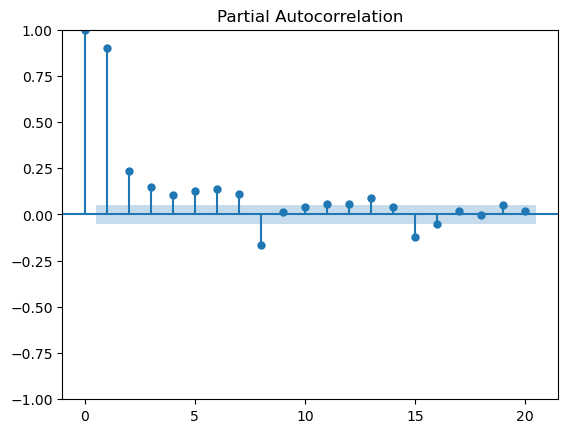

In [39]:
plot_pacf(train_data['total_demand(mw)'], lags=20)
plt.show()

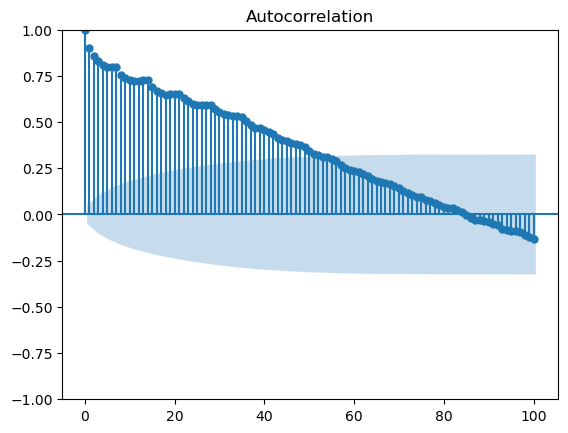

In [40]:
plot_acf(train_data['total_demand(mw)'], lags=100)
plt.show()

In [ ]:
# Ajuster le modèle ARIMA pour PV_production
model_pv = ARIMA(train_data['total_demand(mw)'], order=(2, 0, 0))
model_pv_fit = model_pv.fit()
print(model_pv_fit.summary())
joblib.dump(model_pv_fit, 'arima_model.pkl')
print("The trained ARIMA model has been successfully saved.")

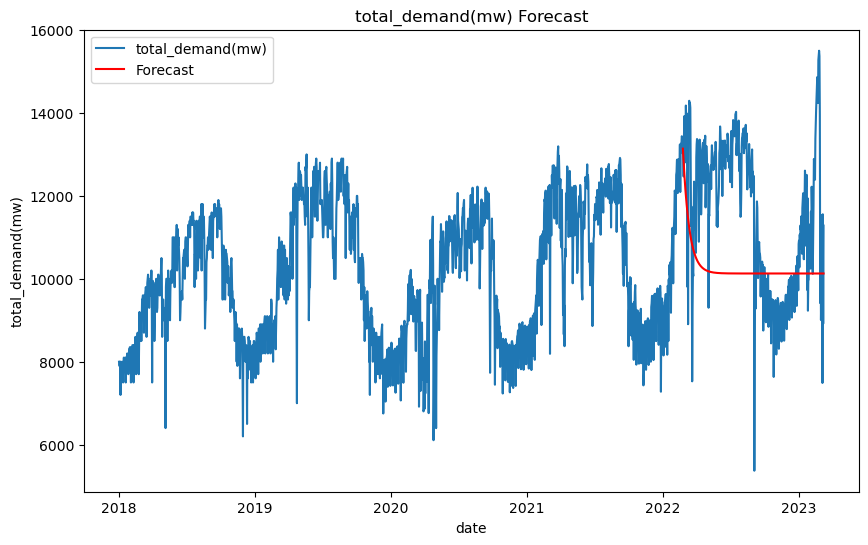

In [ ]:
# Faire des prévisions pour PV_production
forecast_pv = model_pv_fit.forecast(steps=len(test_data)) 
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['total_demand(mw)'], label='total_demand(mw)')
plt.plot(test_data.index, forecast_pv, label='Forecast', color='red')
plt.xlabel('date')
plt.ylabel('total_demand(mw)')
plt.title('total_demand(mw) Forecast')
plt.legend()
plt.show()

Since the data clearly exhibits seasonality, it's evident that the ARIMA model might not yield the best results. Let's try using the SARIMA model instead.

In [ ]:
# Filter the dataset to include only the last 365 days
train_data_last_730_days = train_data.iloc[-730:]

# Display the minimized dataset
train_data_last_730_days.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw),max_generation(mw)
2020-02-25,31.68,18.55,25.115,100.92,3.55,1.01,2.280,0.45,9147.0,9727.0
2020-02-26,32.83,20.74,26.785,100.98,3.56,0.42,1.990,0.06,9998.0,10529.0
2020-02-27,29.89,21.15,25.520,101.13,3.64,0.55,2.095,14.61,9539.0,10186.0
2020-02-28,30.36,18.30,24.330,101.07,4.68,0.31,2.495,0.26,9629.0,10093.0
2020-02-29,31.46,20.16,25.810,100.90,2.07,1.14,1.605,0.64,9812.0,10264.0


In [ ]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_data_last_730_days['total_demand(mw)'], order=(2, 0, 0), seasonal_order=(0, 1, 0, 365))
sarima_model_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit.summary())

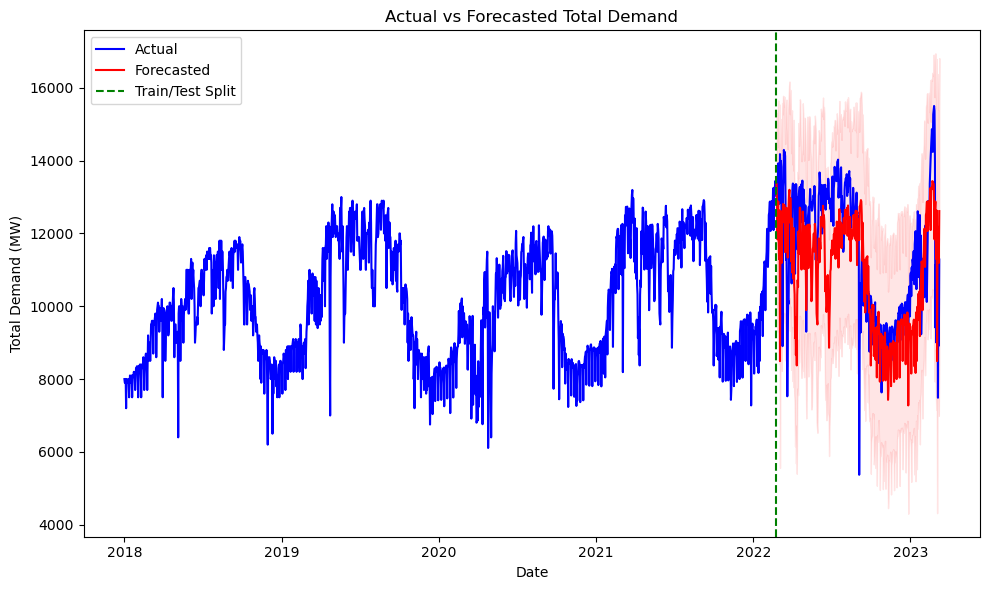

In [ ]:
# Get the forecast for the test period
sarima_test_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
forecast_values_1 = sarima_test_forecast.predicted_mean

# Get confidence intervals if needed
forecast_ci = sarima_test_forecast.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['total_demand(mw)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_1, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci.iloc[:, 0],  # Lower bound
                 forecast_ci.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.title('Actual vs Forecasted Total Demand')
plt.legend()
plt.tight_layout()
plt.show()

2022-02-24    -346.195199
2022-02-25     608.549454
2022-02-26     627.625598
2022-02-27     810.528275
2022-02-28    1046.461052
Freq: D, dtype: float64


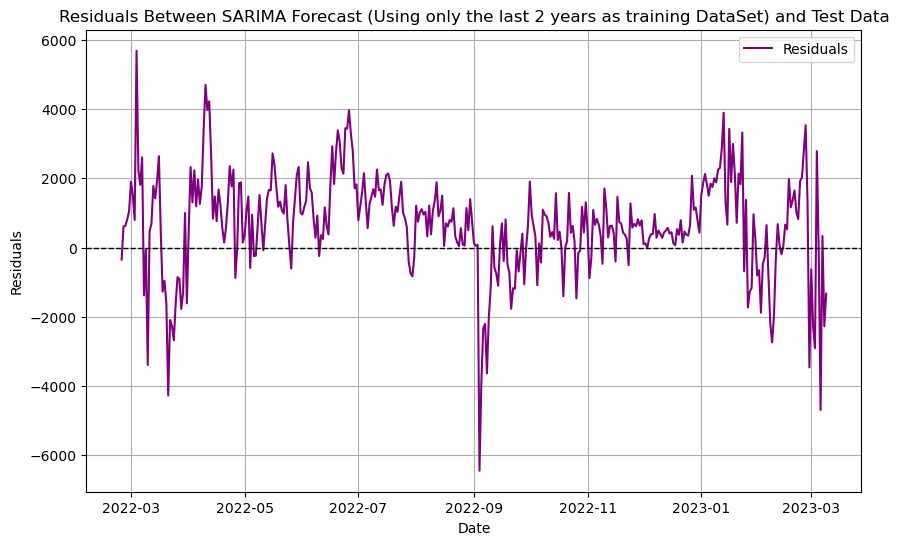

In [ ]:
# Calculer les résiduels
residuals = test_data['total_demand(mw)'] - forecast_values_1

# Afficher les premières lignes des résiduels
print(residuals.head())

# Tracer les résiduels
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Between SARIMA Forecast (Using only the last 2 years as training DataSet) and Test Data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Calculer la somme des résiduels
residuals_sum = residuals.sum()

# Afficher la somme
print("Somme des résiduels:", residuals_sum)

Somme des résiduels: 253765.84179208908


In [ ]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_data['total_demand(mw)'], order=(2, 0, 0), seasonal_order=(0, 1, 0, 365))
sarima_model_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_model_fit.summary())
joblib.dump(sarima_model_fit, "sarima_model_2.pkl")
print("The trained SARIMA model has been successfully saved.")

MemoryError: Unable to allocate 1.52 GiB for an array with shape (367, 367, 1516) and data type float64

In [ ]:
sarima_model_fit = ARIMAResults.load("sarima_model_2.pkl")

In [ ]:
# Get the forecast for the test period
sarima_test_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
forecast_values_2 = sarima_test_forecast.predicted_mean

# Get confidence intervals if needed
forecast_ci = sarima_test_forecast.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))

# Plot the entire actual data (train + test)
plt.plot(data.index, data['total_demand(mw)'], label='Actual', color='blue')

# Plot the forecasted values for the test period
# You need to use the test data's index for proper alignment
plt.plot(test_data.index, forecast_values_2, label='Forecasted', color='red')

# Add confidence intervals if desired
plt.fill_between(test_data.index, 
                 forecast_ci.iloc[:, 0],  # Lower bound
                 forecast_ci.iloc[:, 1],  # Upper bound
                 color='red', alpha=0.1)

# Add a vertical line to mark the train/test split
train_end = train_data.index[-1]
plt.axvline(x=train_end, color='green', linestyle='--', label='Train/Test Split')

plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.title('Actual vs Forecasted Total Demand')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculer les résiduels
residuals = test_data['total_demand(mw)'] - forecast_values_2

# Afficher les premières lignes des résiduels
print(residuals.head())

# Tracer les résiduels
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Between SARIMA Forecast and Test Data')
plt.legend()
plt.grid()
plt.show()